## Rumus Least Square Regression

> ## $\alpha = (A^{T}A)^{-1}A^{T}Y$

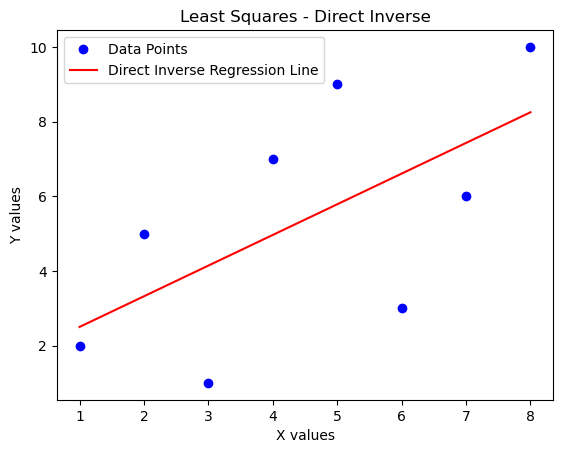

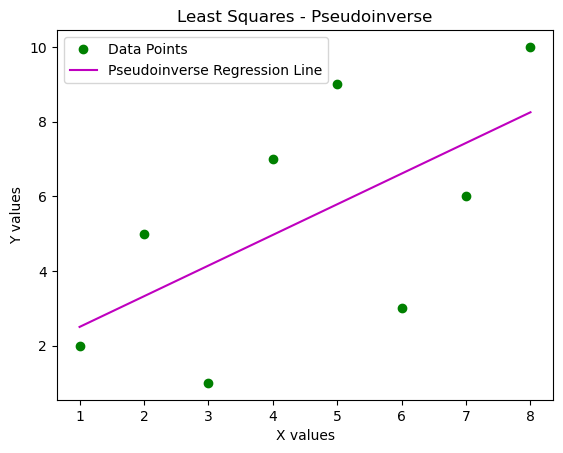

array([[0.82142857],
       [1.67857143]])

In [51]:
# least square regression

import numpy as np
import matplotlib.pyplot as plt

def leastSquare_direct_inverse(x, y): 
    x = np.array(x)
    y = np.array(y)
    
    # np.ones berguna untuk mengisi semua value arraynya menjadi 1 semua 
    # nah parameternya adalah berapa banyak sizenya 
    ones = np.ones(np.size(x))

    A = np.vstack((x, ones)).T
    # np.vstack berguna untuk menggabungkan 2 array (seperti stacking)
    # misalkan x = [1,2,3] | ones = [4,5,6]
    # hasilnya bakalan menjadi
    # [1,2,3]
    # [4,5,6]
    
    # .T atau Traspose simplenya rotate array
    # [1,2,3]
    # [4,5,6]
    # hasilnya bakalan menjadi
    # [1,4]
    # [2,5]
    # [3,6]

    
    y = y[:, np.newaxis]
    
    # Menggunakan Direct Inverse
    first = np.linalg.inv(np.dot(A.T, A))
    alpha_direct = np.dot(np.dot(first, A.T), y)
    
    plt.plot(x, y, 'bo', label='Data Points') 
    plt.plot(x, alpha_direct[0] * x + alpha_direct[1], 'r-', label='Direct Inverse Regression Line') 
    plt.title('Least Squares - Direct Inverse')
    plt.xlabel('X values')
    plt.ylabel('Y values')
    plt.legend()
    plt.show()

    return alpha_direct

def leastSquare_pseudoinverse(x, y): 
    x = np.array(x)
    y = np.array(y)
    ones = np.ones(np.size(x))
    A = np.vstack((x, ones)).T
    y = y[:, np.newaxis]
    
    # Menggunakan Pseudoinverse
    alpha_pseudo = np.dot(np.linalg.pinv(A), y)
    
    plt.plot(x, y, 'go', label='Data Points') 
    plt.plot(x, alpha_pseudo[0] * x + alpha_pseudo[1], 'm-', label='Pseudoinverse Regression Line') 
    plt.title('Least Squares - Pseudoinverse')
    plt.xlabel('X values')
    plt.ylabel('Y values')
    plt.legend()
    plt.show()

    return alpha_pseudo
    
x = [
    1,2,3,4,5,6,7,8
]

y = [
    2,5,1,7,9,3,6,10
    
]

leastSquare_direct_inverse(x, y)
leastSquare_pseudoinverse(x, y)

In [72]:
import numpy as np
import matplotlib.pyplot as plt

x = [1,2,3,4,5,6,7,8]
y = [2,5,1,7,9,3,6,10]

x = np.array(x)
y = np.array(y)

A = np.stack([x, np.ones(len(x))]).T
y = y[:, np.newaxis]
print(A)

first = np.linalg.inv(np.dot(A.T , A))
second = np.dot(first, A.T)
alpha = np.dot(second, y)

print(alpha) 

# plt.plot(x, y, 'bo')
# plt.plot(x, alpha[0] * x + alpha[1], 'r')
# plt.show()

[[1. 1.]
 [2. 1.]
 [3. 1.]
 [4. 1.]
 [5. 1.]
 [6. 1.]
 [7. 1.]
 [8. 1.]]
[[1. 2. 3. 4. 5. 6. 7. 8.]
 [1. 1. 1. 1. 1. 1. 1. 1.]]
[[1. 1.]
 [2. 1.]
 [3. 1.]
 [4. 1.]
 [5. 1.]
 [6. 1.]
 [7. 1.]
 [8. 1.]]
[[204.  36.]
 [ 36.   8.]]
[[0.82142857]
 [1.67857143]]


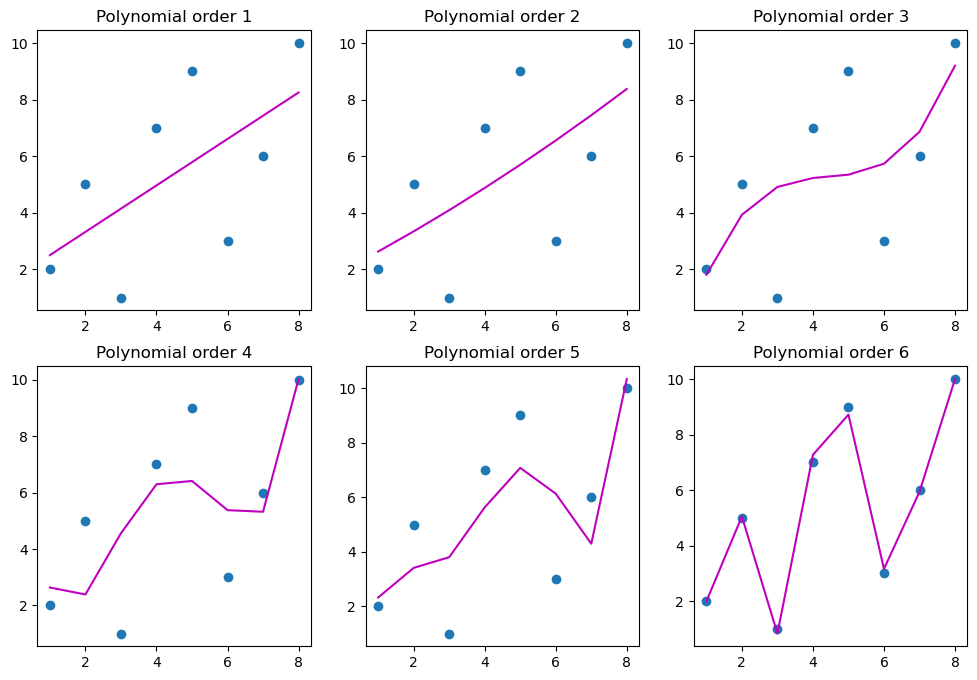

In [77]:
import numpy as np
import matplotlib.pyplot as plt

x = [1,2,3,4,5,6,7,8]
y = [2,5,1,7,9,3,6,10]

x = np.array(x)
y = np.array(y)

plt.figure(figsize=(12,8))
for i in range(1, 7):
    plt.subplot(2,3, i)
    plt.plot(x,y, 'o')
    
    y_est = np.polyfit(x, y, i)
    plt.plot(x, np.polyval(y_est, x), 'm-')
    plt.title(f"Polynomial order {i}")
    
plt.show()

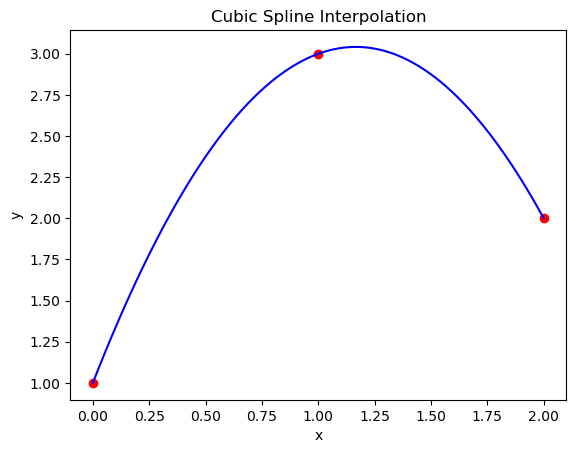

In [79]:
from scipy.interpolate import CubicSpline
import numpy as np 
import matplotlib.pyplot as plt

x = [0,1,2]
y = [1,3,2]

f = CubicSpline(x, y)

x_new = np.linspace(0,2,100)
y_new = f(x_new)

plt.plot(x, y, 'ro')
plt.plot(x_new, y_new, 'b')
plt.title("Cubic Spline Interpolation")
plt.xlabel('x')
plt.ylabel('y')

plt.show()